# Objectives

Perform primary data processing

View the distribution of numeric variables

Eliminate emissions

Estimate the number of unique values for nominative variables

Conduct a correlation analysis (of quantitative variables)

Remove non-correlating variables

Formulate conclusions

# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50) 

students_df= pd.read_csv('stud_math.csv')

In [2]:
display(students_df.head(10))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [3]:
students_df.columns = [
    'school',
    'sex',
    'age',
    'address',
    'family_size',
    'relations',
    'mother_education',
    'father_education', 
    'mother_job',
    'father_job',
    'choosing_school_reason',
    'guardian',
    'travel_time',
    'study_time',
    'failures',
    'has_schools_up',
    'has_families_up',
    'has_paid_classes',
    'has_activities',
    'has_nursery',
    'studytime_granular',
    'wants_higher',
    'internet_access',
    'romantic',
    'family_relations',
    'free_time',
    'go_out',
    'health',
    'absences',
    'score'
]
display(students_df.head(10))

,school,sex,age,address,family_size,relations,mother_education,father_education,mother_job,father_job,choosing_school_reason,guardian,travel_time,study_time,failures,has_schools_up,has_families_up,has_paid_classes,has_activities,has_nursery,studytime_granular,wants_higher,internet_access,romantic,family_relations,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [4]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   school                  395 non-null    object 
 1   sex                     395 non-null    object 
 2   age                     395 non-null    int64  
 3   address                 378 non-null    object 
 4   family_size             368 non-null    object 
 5   relations               350 non-null    object 
 6   mother_education        392 non-null    float64
 7   father_education        371 non-null    float64
 8   mother_job              376 non-null    object 
 9   father_job              359 non-null    object 
 10  choosing_school_reason  378 non-null    object 
 11  guardian                364 non-null    object 
 12  travel_time             367 non-null    float64
 13  study_time              388 non-null    float64
 14  failures                373 non-null    fl

In [5]:
def replace_frequent(title):
    frequent = students_df[title].value_counts().index[0]
    students_df[title] = students_df[title].apply(lambda x: frequent if pd.isna(x) else x)
    
def replace_value(title, value):
    students_df[title] = students_df[title].apply(lambda x: value if pd.isna(x) else x)

# Missing data (percent):

In [6]:
all_df= len(students_df)
students_df.isnull().sum().apply(lambda x: round(x * 100 / all_df, 2))

school                     0.00
sex                        0.00
age                        0.00
address                    4.30
family_size                6.84
relations                 11.39
mother_education           0.76
father_education           6.08
mother_job                 4.81
father_job                 9.11
choosing_school_reason     4.30
guardian                   7.85
travel_time                7.09
study_time                 1.77
failures                   5.57
has_schools_up             2.28
has_families_up            9.87
has_paid_classes          10.13
has_activities             3.54
has_nursery                4.05
studytime_granular         1.77
wants_higher               5.06
internet_access            8.61
romantic                   7.85
family_relations           6.84
free_time                  2.78
go_out                     2.03
health                     3.80
absences                   3.04
score                      1.52
dtype: float64

No NaN(columns):

    school

    sex

    age
A lot of NaN(columns):
    
    relations
    
    has_paid_classes
    
    has_families_up  

# Now let's look at all the columns separately :

# school

In [7]:
students_df.school.value_counts(normalize=True)

GP    0.883544
MS    0.116456
Name: school, dtype: float64

At GP school : 88 % of students

At MS school to : 12 % of students

# Average Score 

In [8]:
students_df[['school', 'score']].groupby(by=['school']).mean()

,score
school,
GP,52.630814
MS,49.444444


The average score in schools is about the same

# SEX

In [9]:
students_df.sex.value_counts(normalize=True)

F    0.526582
M    0.473418
Name: sex, dtype: float64

Male : 53%

Female: 47%

In [10]:
students_df[['sex','score']].groupby(by=['sex']).mean()

,score
sex,
F,50.098039
M,54.648649


There are no empty values.

The values are distributed almost equally.

Male has a slightly higher average score.

# Age

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

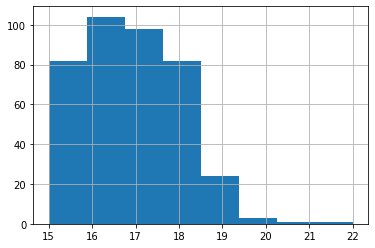

In [11]:
students_df.age.hist(bins = len(students_df.age.value_counts()))
students_df.age.describe()

There are students with the age of 22, this is a little out of line with the column data.

Since the boundaries are from 15 to 22.

Most likely, up to(including) 22.

#  Outliers:

In [12]:
def quantiles_info(columns):
    median = columns.median()
    IQR = columns.quantile(0.75) - columns.quantile(0.25)
    perc25 = columns.quantile(0.25)
    perc75 = columns.quantile(0.75)
    print('25th percentile: {},'.format(perc25), '75th percentile: {},'.format(perc75)
          , "IQR: {}, ".format(IQR)," Outliers: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

In [13]:
quantiles_info(students_df.age)

25th percentile: 16.0, 75th percentile: 18.0, IQR: 2.0,   Outliers: [13.0, 21.0].


We can see that the outliers are: from 13.0 to 21.0 .

But since 22 this value looks normal and may be true. We leave it in the selection.

# Address

In [14]:
students_df.address.value_counts( normalize=True)

U    0.780423
R    0.219577
Name: address, dtype: float64

<AxesSubplot:>

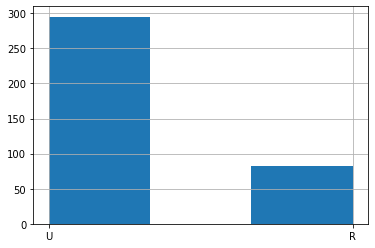

In [15]:
students_df.address.hist(bins=3)

# family_size

In [16]:
students_df.family_size.value_counts(normalize=True)

GT3    0.709239
LE3    0.290761
Name: family_size, dtype: float64

<AxesSubplot:>

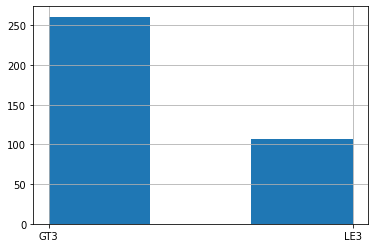

In [17]:
students_df.family_size.hist(bins=3)

# relations

In [18]:
students_df.relations.value_counts(dropna=False, normalize=True)

T      0.794937
NaN    0.113924
A      0.091139
Name: relations, dtype: float64

Since there are a lot of missing values. It would be better if we put them in a separate category.

In [19]:
students_df.relations = students_df.relations.fillna('N')

<AxesSubplot:>

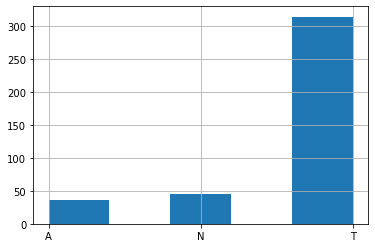

In [20]:
students_df.relations.hist(bins=5)

79 % of students live in a full family .The remaining 21% of the data was almost equally divided between NaN and single - parent families .

# mother_education

In [21]:
students_df.mother_education.value_counts(dropna=False, normalize=True)

4.0    0.331646
2.0    0.258228
3.0    0.245570
1.0    0.149367
0.0    0.007595
NaN    0.007595
Name: mother_education, dtype: float64

<AxesSubplot:>

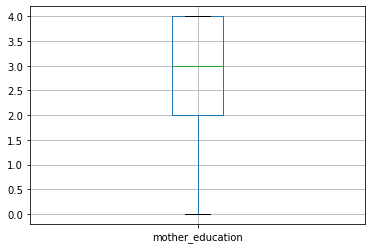

In [22]:
students_df.boxplot(column='mother_education')

33% of mothers have higher education.

There are no outliers, there are a small number of missing values.

# father_education

In [23]:
students_df.father_education.value_counts(dropna=False, normalize=True)

2.0     0.268354
3.0     0.243038
4.0     0.222785
1.0     0.197468
NaN     0.060759
0.0     0.005063
40.0    0.002532
Name: father_education, dtype: float64

All values are between 0 and 4 .But there is also an outlier(40)

<AxesSubplot:>

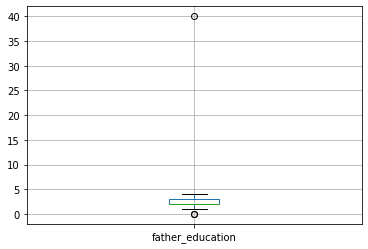

In [24]:
students_df.boxplot(column='father_education')

Most of the fathers received secondary education 

# mother_job

In [25]:
students_df.mother_job.value_counts(dropna=False,normalize=True)

other       0.336709
services    0.248101
at_home     0.146835
teacher     0.139241
health      0.081013
NaN         0.048101
Name: mother_job, dtype: float64

There are gaps(NaN) - connect NaN with Other

In [26]:
replace_value('mother_job', 'other')
students_df.mother_job.value_counts(dropna=False, normalize=True)

other       0.384810
services    0.248101
at_home     0.146835
teacher     0.139241
health      0.081013
Name: mother_job, dtype: float64

<AxesSubplot:>

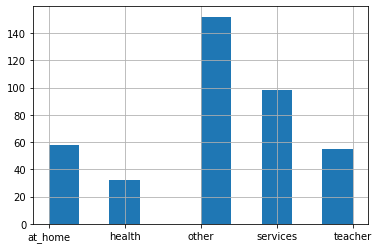

In [27]:
students_df.mother_job.hist()

# father_job

In [28]:
students_df.father_job.value_counts(dropna=False, normalize=True)

other       0.498734
services    0.258228
NaN         0.091139
teacher     0.073418
at_home     0.040506
health      0.037975
Name: father_job, dtype: float64

In [29]:
replace_value('father_job', 'other')
students_df.father_job.value_counts(dropna=False, normalize=True)

other       0.589873
services    0.258228
teacher     0.073418
at_home     0.040506
health      0.037975
Name: father_job, dtype: float64

<AxesSubplot:>

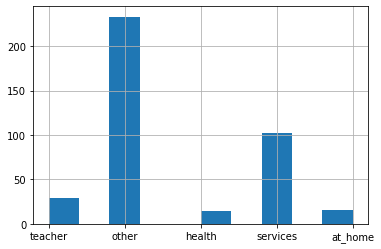

In [30]:
students_df.father_job.hist()

Most fathers indicated that their job is other.Since we do not know what is in -other, this data is not of great importance.

# choosing_school_reason

In [31]:
students_df.choosing_school_reason.value_counts(dropna=False, normalize=True)

course        0.346835
home          0.263291
reputation    0.260759
other         0.086076
NaN           0.043038
Name: choosing_school_reason, dtype: float64

In [32]:
replace_value('choosing_school_reason', 'other')
students_df.choosing_school_reason.value_counts(dropna=False, normalize=True)

course        0.346835
home          0.263291
reputation    0.260759
other         0.129114
Name: choosing_school_reason, dtype: float64

<AxesSubplot:>

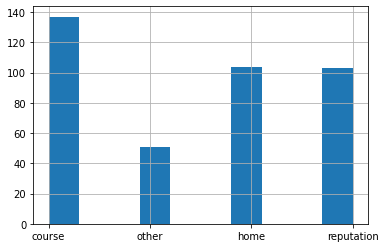

In [33]:
students_df.choosing_school_reason.hist()

As we can see, the curriculum is the main factor in choosing a school.

# guardian

In [34]:
students_df.guardian.value_counts(dropna=False, normalize=True)

mother    0.632911
father    0.217722
NaN       0.078481
other     0.070886
Name: guardian, dtype: float64

In [35]:
replace_value('guardian', 'other')
students_df.guardian.value_counts(dropna=False, normalize=True)

mother    0.632911
father    0.217722
other     0.149367
Name: guardian, dtype: float64

<AxesSubplot:>

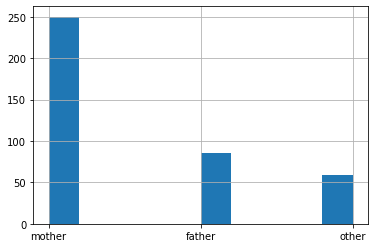

In [36]:
students_df.guardian.hist()

In [37]:
students_df.travel_time.value_counts(dropna=False,normalize=True)

1.0    0.612658
2.0    0.243038
NaN    0.070886
3.0    0.055696
4.0    0.017722
Name: travel_time, dtype: float64

In [38]:
replace_frequent('travel_time')

<AxesSubplot:>

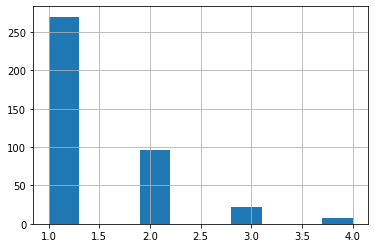

In [39]:
students_df.travel_time.hist()

Most of the students live near the school.

# study_time

In [40]:
students_df.study_time.value_counts(dropna=False, normalize=True)

2.0    0.491139
1.0    0.260759
3.0    0.162025
4.0    0.068354
NaN    0.017722
Name: study_time, dtype: float64

In [41]:
replace_frequent('study_time')

<AxesSubplot:>

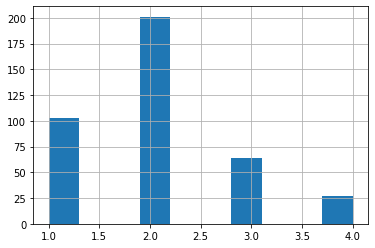

In [42]:
students_df.study_time.hist()

# failures

In [43]:
students_df.failures.value_counts(dropna=False, normalize=True)

0.0    0.741772
1.0    0.124051
NaN    0.055696
2.0    0.040506
3.0    0.037975
Name: failures, dtype: float64

In [44]:
replace_frequent('failures')

<AxesSubplot:>

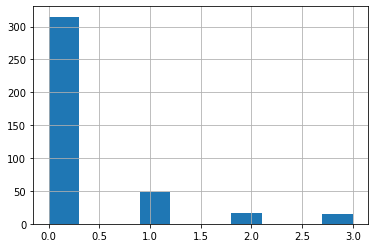

In [45]:
students_df.failures.hist()

There is an error in the data, as the bulk of the data falls on the value 0.The limits of acceptable values are from 1 to 4.

Delete the column.

In [46]:
students_df.drop(['failures'], axis=1, inplace=True)

In [47]:
students_df.head(1)

,school,sex,age,address,family_size,relations,mother_education,father_education,mother_job,father_job,choosing_school_reason,guardian,travel_time,study_time,has_schools_up,has_families_up,has_paid_classes,has_activities,has_nursery,studytime_granular,wants_higher,internet_access,romantic,family_relations,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0


# has_schools_up

In [48]:
students_df.has_schools_up.value_counts(dropna=False, normalize=True)

no     0.848101
yes    0.129114
NaN    0.022785
Name: has_schools_up, dtype: float64

<AxesSubplot:>

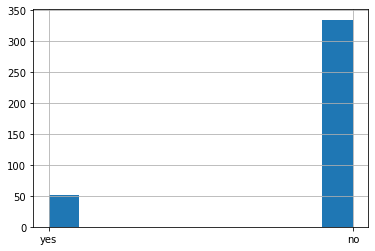

In [49]:
students_df.has_schools_up.hist()

We see that 85% of students do not receive support.

# has_families_up

In [50]:
students_df.has_families_up.value_counts(dropna=False, normalize=True)

yes    0.554430
no     0.346835
NaN    0.098734
Name: has_families_up, dtype: float64

A lot of NaN Values

In [51]:
students_df.has_families_up = students_df.has_families_up.fillna('N')

<AxesSubplot:>

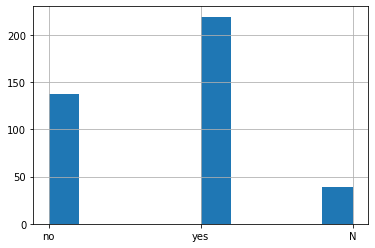

In [52]:
students_df.has_families_up.hist()

55% of students receive support from their families.

# has_paid_classes

In [53]:
students_df.has_paid_classes.value_counts(dropna=False, normalize=True)

no     0.506329
yes    0.392405
NaN    0.101266
Name: has_paid_classes, dtype: float64

A lot of NaN values , create an additional column.

<AxesSubplot:>

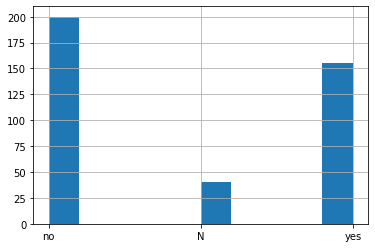

In [54]:
students_df.has_paid_classes = students_df.has_paid_classes.fillna('N')
students_df.has_paid_classes.hist()

50% of students do not have paid classes, and 40% do.

# has_activities

In [55]:
students_df.has_activities.value_counts(dropna=False, normalize=True)

yes    0.493671
no     0.470886
NaN    0.035443
Name: has_activities, dtype: float64

<AxesSubplot:>

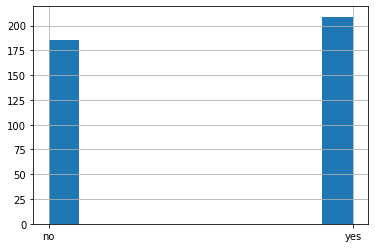

In [56]:
replace_frequent('has_activities')
students_df.has_activities.hist()

the data is distributed almost equally.

# has_nursery

In [57]:
students_df.has_nursery.value_counts(dropna=False, normalize=True)

yes    0.759494
no     0.200000
NaN    0.040506
Name: has_nursery, dtype: float64

<AxesSubplot:>

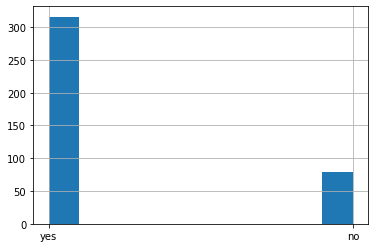

In [58]:
replace_frequent('has_nursery')
students_df.has_nursery.hist()

After replacing the missing values, it turned out that almost 80% of students went to kindergarten.

# studytime_granular

In [59]:
students_df.studytime_granular.value_counts(dropna=False, normalize=True)

-6.0     0.491139
-3.0     0.260759
-9.0     0.162025
-12.0    0.068354
 NaN     0.017722
Name: studytime_granular, dtype: float64

<AxesSubplot:>

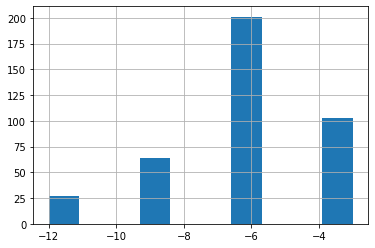

In [60]:
replace_frequent('studytime_granular')
students_df.studytime_granular.hist()

Unfortunately, the description of this column is unknown to us.Perhaps this column is related to study_time.

# wants_higher

In [61]:
students_df.wants_higher.value_counts(dropna=False, normalize=True)

yes    0.901266
NaN    0.050633
no     0.048101
Name: wants_higher, dtype: float64

More than 90% of the positive values.Most likely, this data is not relevant.

# internet_access

In [62]:
students_df.internet_access.value_counts(dropna=False, normalize=True)

yes    0.772152
no     0.141772
NaN    0.086076
Name: internet_access, dtype: float64

<AxesSubplot:>

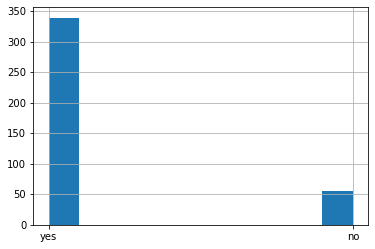

In [63]:
replace_frequent('internet_access')
students_df.internet_access.hist()

85% of students have access to the Internet.

# romantic

In [64]:
students_df.romantic.value_counts(dropna=False, normalize=True)

no     0.607595
yes    0.313924
NaN    0.078481
Name: romantic, dtype: float64

<AxesSubplot:>

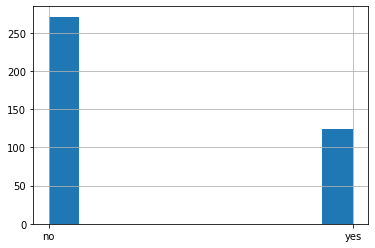

In [65]:
replace_frequent('romantic')
students_df.romantic.hist()

More than 67% of students are not in a relationship.

# family_relations

In [66]:
students_df.family_relations.value_counts(dropna=False, normalize=True)

 4.0    0.460759
 5.0    0.250633
 3.0    0.156962
 NaN    0.068354
 2.0    0.043038
 1.0    0.017722
-1.0    0.002532
Name: family_relations, dtype: float64

Limits: from 1 to 5
-1 is clearly knocked out. Let's assume that this is a mechanical error.

<AxesSubplot:>

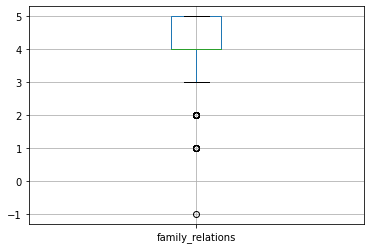

In [67]:
students_df.boxplot(column='family_relations')

Less than half of the students have good family relationships.

# free_time

In [68]:
students_df.free_time.value_counts(dropna=False, normalize=True)

3.0    0.387342
4.0    0.283544
2.0    0.159494
5.0    0.096203
1.0    0.045570
NaN    0.027848
Name: free_time, dtype: float64

<AxesSubplot:>

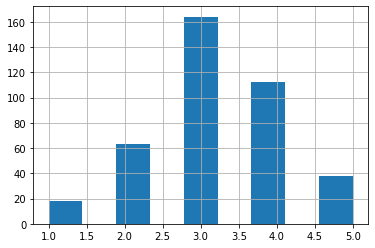

In [69]:
replace_frequent('free_time')
students_df.free_time.hist(bins=9)

<AxesSubplot:>

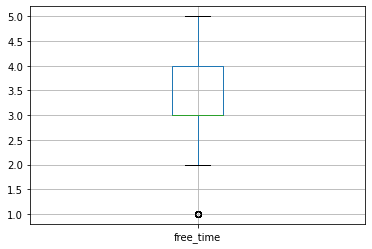

In [70]:
students_df.boxplot(column='free_time')

But the value(1) fits into the framework.

# go_out

In [71]:
students_df.go_out.value_counts(dropna=False, normalize=True)

3.0    0.321519
2.0    0.255696
4.0    0.212658
5.0    0.131646
1.0    0.058228
NaN    0.020253
Name: go_out, dtype: float64

<AxesSubplot:>

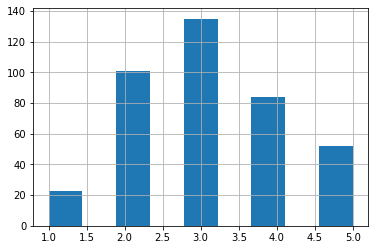

In [72]:
replace_frequent('go_out')
students_df.go_out.hist(bins=9)

# health

In [73]:
students_df.health.value_counts(dropna=False, normalize=True)

5.0    0.349367
3.0    0.225316
4.0    0.159494
1.0    0.118987
2.0    0.108861
NaN    0.037975
Name: health, dtype: float64

<AxesSubplot:>

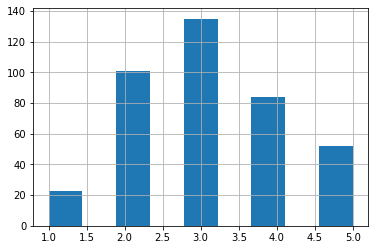

In [74]:
replace_frequent('health')
students_df.go_out.hist(bins=9)

# absences

In [75]:
students_df.absences.describe()

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

<AxesSubplot:>

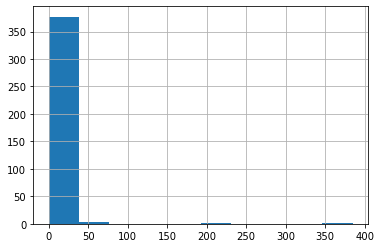

In [76]:
students_df.absences.hist()

<AxesSubplot:>

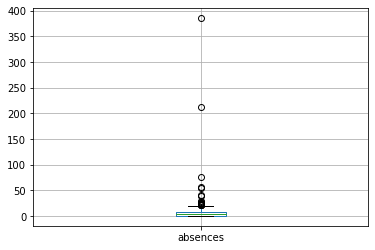

In [77]:
students_df.boxplot(column='absences')

25th percentile: 0.0, 75th percentile: 8.0, IQR: 8.0,  Outliers: [-12.0, 20.0].


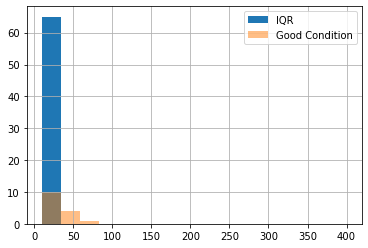

In [92]:
IQR = students_df.absences.quantile(0.75) - students_df.absences.quantile(0.25)
perc25 = students_df.absences.quantile(0.25)
perc75 = students_df.absences.quantile(0.75)
 
print(
'25th percentile: {},'.format(perc25),
'75th percentile: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Outliers: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
students_df.absences.loc[students_df.absences.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 16, range = (10, 400), label = 'IQR')
 
students_df.absences.loc[students_df.absences >20].hist(
alpha = 0.5, bins = 16, range = (10, 400), label = 'Good Condition')
 
plt.legend()

In [79]:
students_df[students_df.absences>20].absences.sort_values()

260     21.0
313     22.0
277     22.0
216     22.0
320     23.0
198     24.0
40      25.0
103     26.0
205     28.0
280     30.0
307     38.0
315     40.0
74      54.0
183     56.0
276     75.0
390    212.0
222    385.0
Name: absences, dtype: float64

In [80]:
students_df = students_df[students_df.absences<=75]

In [81]:
students_df.absences.sort_values()


337     0.0
341     0.0
117     0.0
249     0.0
334     0.0
       ... 
307    38.0
315    40.0
74     54.0
183    56.0
276    75.0
Name: absences, Length: 381, dtype: float64

most of the students go to class.

# score

Score is the value that we will predict.

In [82]:
students_df.score.value_counts(dropna=False,normalize=True)

50.0     0.139108
55.0     0.120735
0.0      0.094488
65.0     0.081365
75.0     0.081365
40.0     0.076115
60.0     0.076115
70.0     0.070866
45.0     0.068241
80.0     0.041995
30.0     0.039370
90.0     0.028871
35.0     0.023622
25.0     0.018373
95.0     0.013123
NaN      0.013123
85.0     0.007874
100.0    0.002625
20.0     0.002625
Name: score, dtype: float64

We need to delete Nan because we cannot make assumptions and combine them with other values.

In [83]:
students_df.dropna(subset=['score'], inplace=True)
students_df.score.value_counts(dropna=False, normalize=True)

50.0     0.140957
55.0     0.122340
0.0      0.095745
75.0     0.082447
65.0     0.082447
40.0     0.077128
60.0     0.077128
70.0     0.071809
45.0     0.069149
80.0     0.042553
30.0     0.039894
90.0     0.029255
35.0     0.023936
25.0     0.018617
95.0     0.013298
85.0     0.007979
100.0    0.002660
20.0     0.002660
Name: score, dtype: float64

<AxesSubplot:>

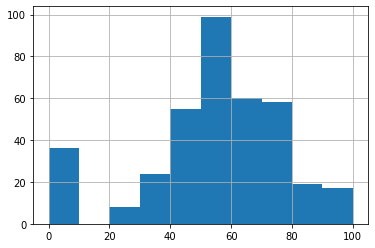

In [84]:
students_df.score.hist()

<AxesSubplot:>

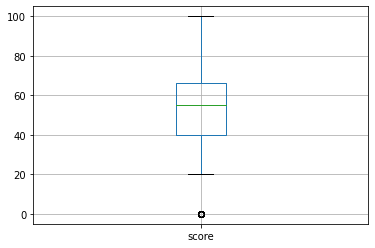

In [85]:
students_df.boxplot(column='score')

# Correlation analysis

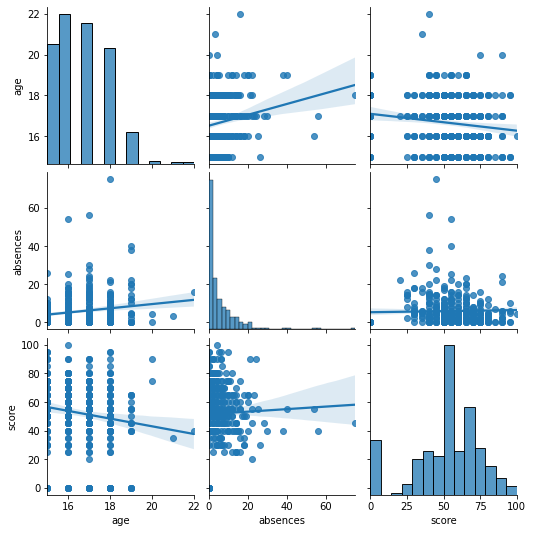

In [86]:
sns.pairplot(students_df[['age','absences','score']],kind='reg')

# Analysis of nominative variables

In [87]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score',data=students_df,ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

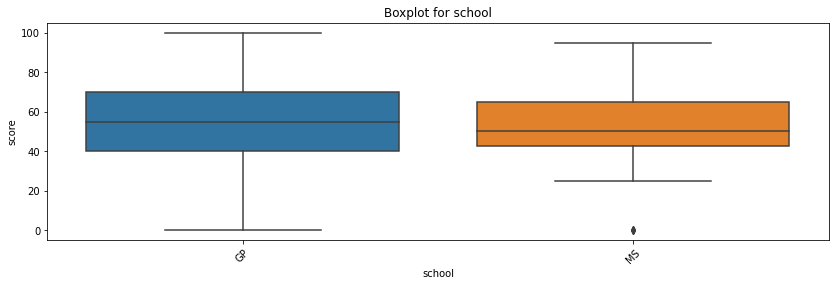

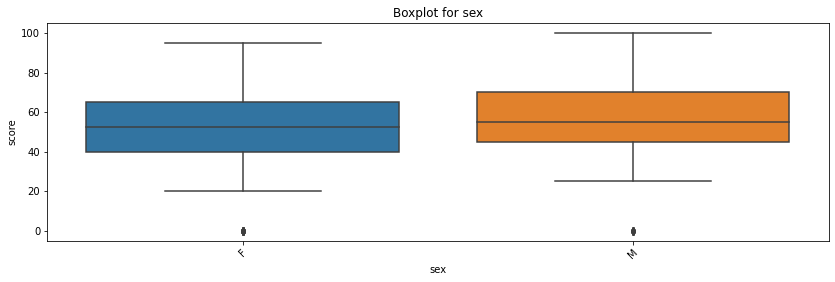

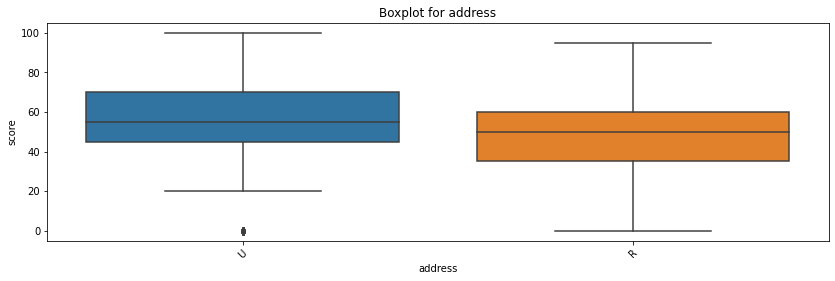

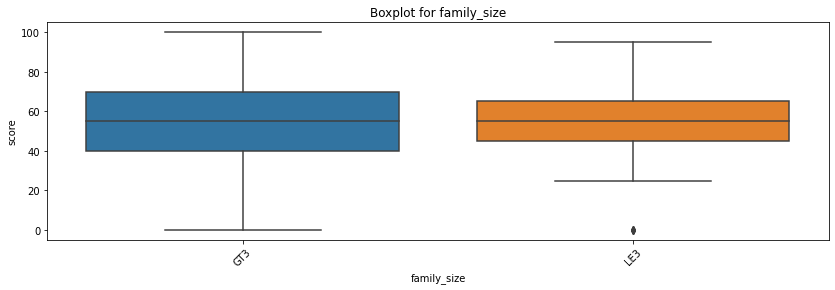

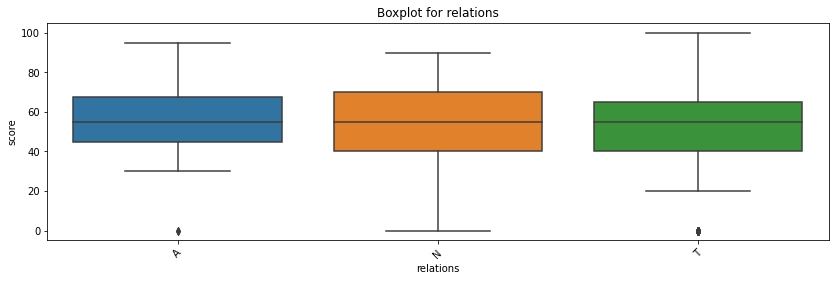

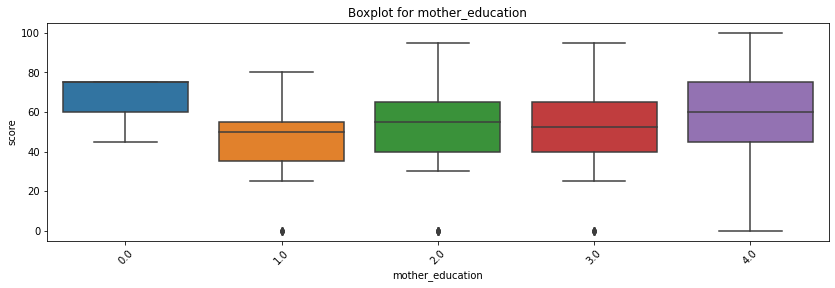

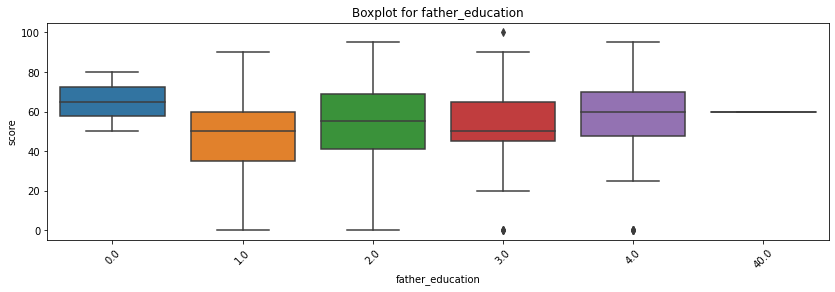

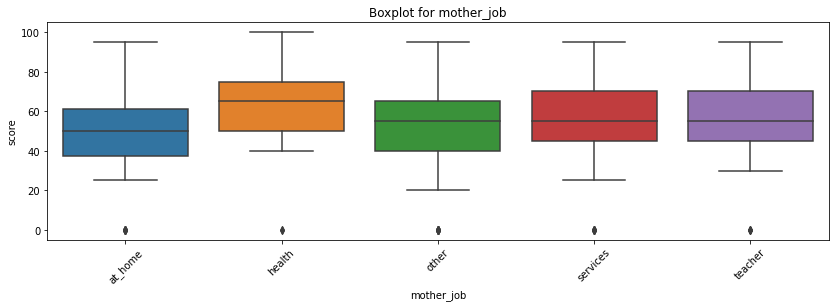

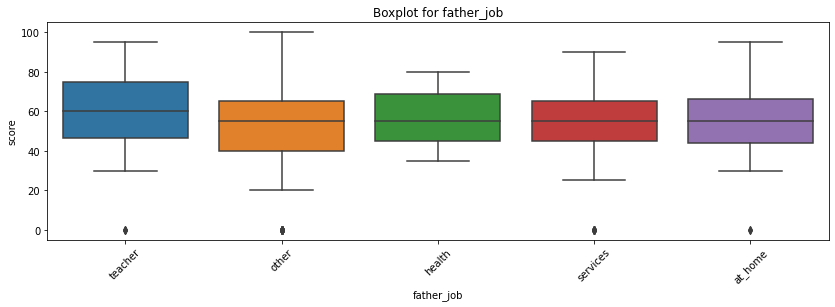

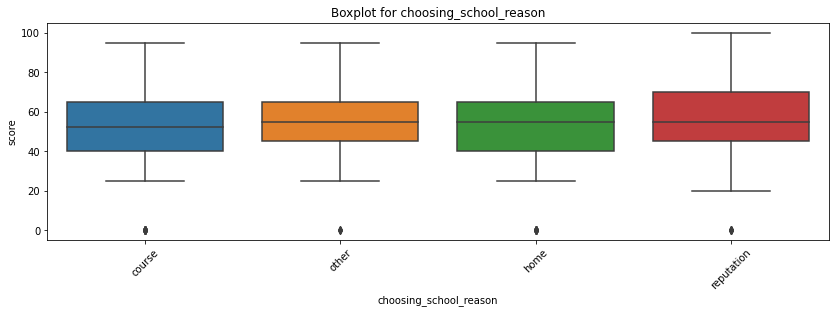

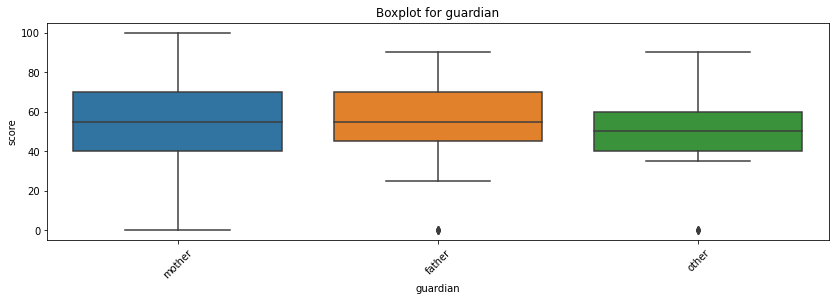

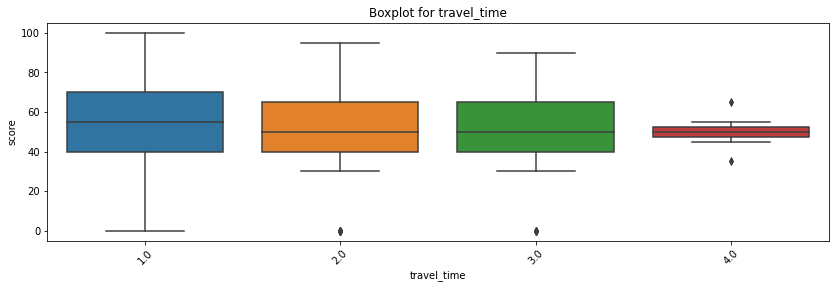

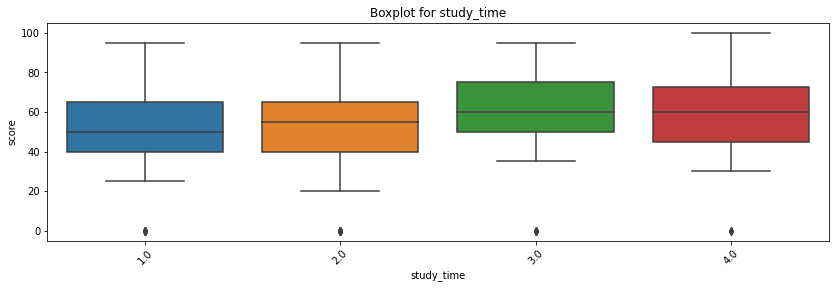

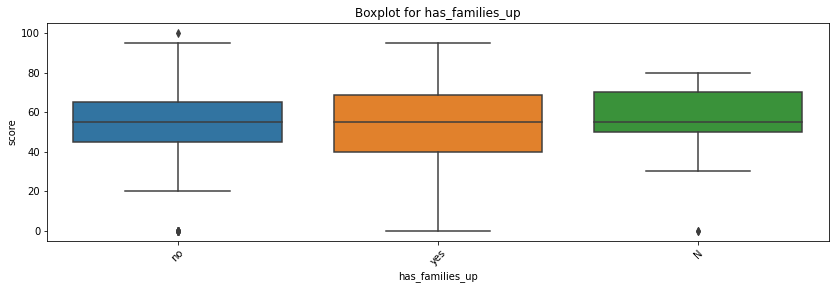

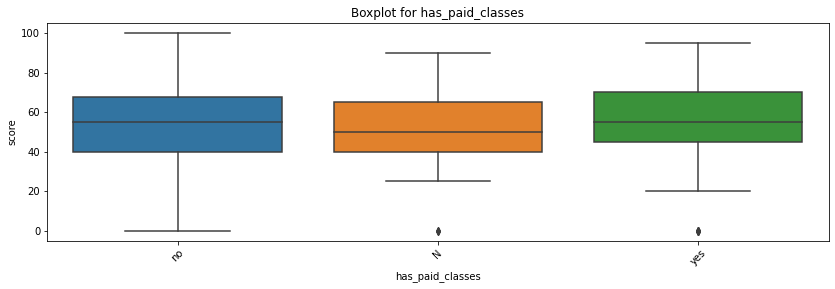

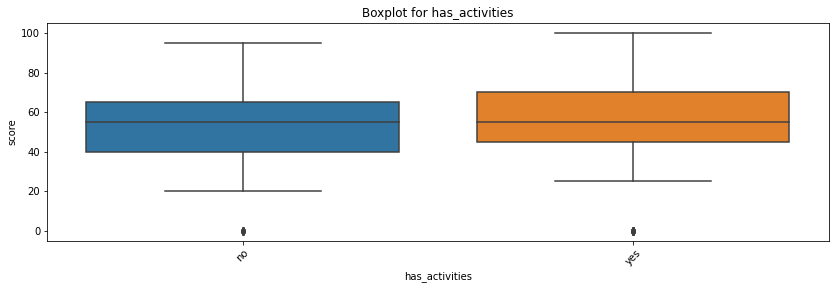

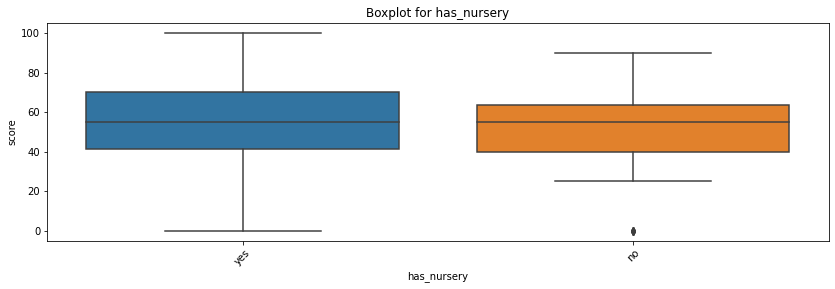

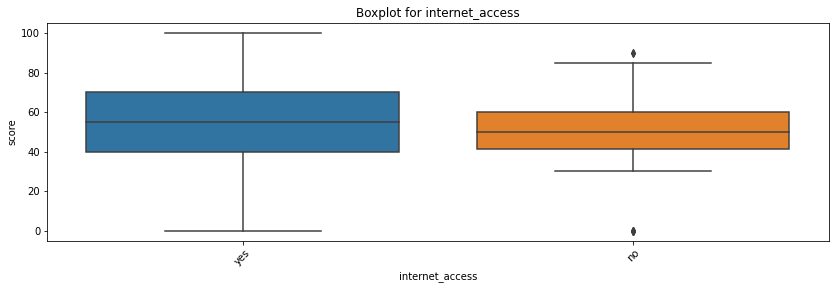

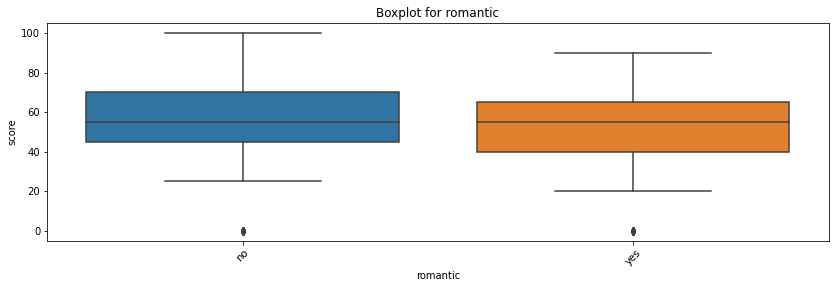

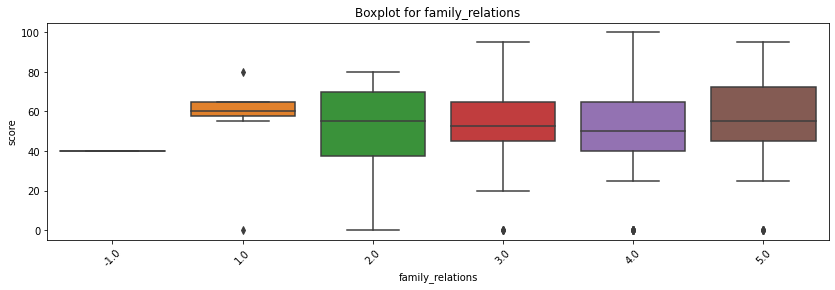

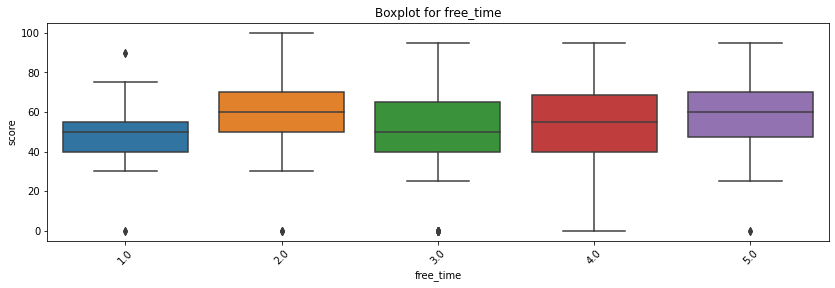

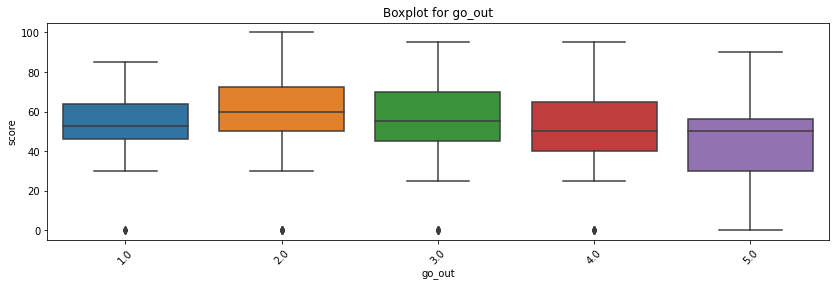

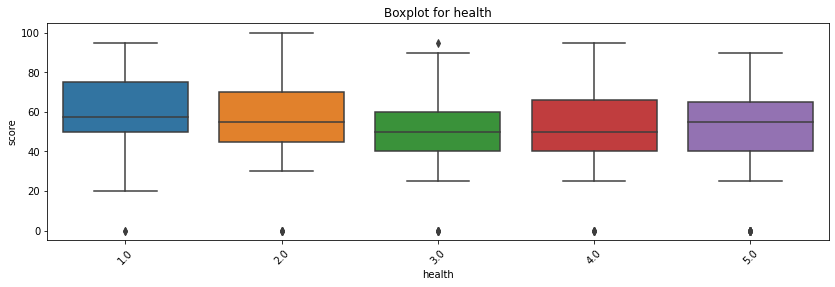

In [88]:
for col in ['school', 'sex', 'address', 'family_size', 'relations',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'choosing_school_reason', 'guardian', 'travel_time', 'study_time',
       'has_families_up', 'has_paid_classes',
       'has_activities', 'has_nursery', 'internet_access',
       'romantic', 'family_relations', 'free_time', 'go_out', 'health']:
    get_boxplot(col)

In [93]:
def get_stat_dif(column):
    cols = students_df.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students_df.loc[students_df.loc[:, column] == comb[0], 'score'], 
                        students_df.loc[students_df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Statistically significant differences were found for the column', column)
            break

In [94]:
for col in ['school', 'sex', 'address', 'family_size', 'relations',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'choosing_school_reason', 'guardian', 'travel_time', 'study_time',
       'has_families_up', 'has_paid_classes',
       'has_activities', 'has_nursery', 'internet_access',
       'romantic', 'family_relations', 'free_time', 'go_out', 'health']:
    get_stat_dif(col)

Statistically significant differences were found for the column sex
Statistically significant differences were found for the column address
Statistically significant differences were found for the column mother_education
Statistically significant differences were found for the column mother_job
Statistically significant differences were found for the column romantic
Statistically significant differences were found for the column go_out


/Users/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:2

In [95]:
stat_result_df = students_df[['sex', 'address', 'mother_education', 'mother_job', 'romantic', 'go_out','score']]
stat_result_df

,sex,address,mother_education,mother_job,romantic,go_out,score
0,F,U,4.0,at_home,no,4.0,30.0
1,F,U,1.0,at_home,no,3.0,30.0
2,F,U,1.0,at_home,no,2.0,50.0
3,F,U,4.0,health,yes,2.0,75.0
4,F,U,3.0,other,no,2.0,50.0
...,...,...,...,...,...,...,...
389,F,U,1.0,other,no,1.0,0.0
391,M,U,3.0,services,no,5.0,80.0
392,M,R,1.0,other,no,3.0,35.0
393,M,R,3.0,services,no,1.0,50.0


# Conclusions

As a result of the EDA , the following results were obtained to analyze the impact of the living conditions of students aged 15-22 on their academic performance in mathematics :

- The data was completed and contained quite a few empty values, only 3 columns were missing data.
- There were few emissions ; all the errors were mechanical .
- In some columns , the data was useless and correlated with other columns .
- The most important parameters that are proposed to be used in the future to build a model are 'sex', 'address', 'mother_education', 'mother_job', 'romantic', 'go_out', 'score'.